# 13.3	Optimierung von Glühstiftkerzen

In [4]:
import numpy as np
from pyDOE2 import *
from statsmodels.formula.api import ols
from scipy.stats import t   
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [62]:
def Schwindung(x):
#S = Schwindung([Temp,Time,Pres])

    S =    (5.7875e-3 + 0.4841e-3*x[:,0] + 0.1225e-3*x[:,1] + 0.3894e-3*x[:,2]-2.2375e-6*x[:,0]*x[:,2] - 2.5233e-006*x[:,1]**2 + 0.002*stats.norm.rvs(0,1,np.size(x[:,0])))*100
    return S
       

a) Erstellen des vollfaktoriellen Versuchsplans und Umrechnen in die gegebenen Werte

In [63]:
#Definition und Berechnung des vollfaktoriellen Versuchsplans

ff_design = fullfact([3, 3, 3])+1
#Xff=[Temp,Time,Pres]
Xff =np.array( [ff_design[:,0]*50-50, ff_design[:,1]*15-10, ff_design[:,2]*20]).T
Sff=Schwindung(Xff)
Sff

array([1.53494722, 3.40412935, 5.73501074, 1.58855407, 3.54049064,
       5.72465736, 1.24417965, 3.83977266, 5.94133108, 2.04435784,
       4.36725848, 5.99800312, 2.45961976, 4.34721101, 6.15264599,
       1.96311822, 4.25856057, 6.16328335, 2.92046271, 4.35060014,
       6.54711989, 3.01081232, 4.87979112, 6.5312295 , 3.11757698,
       4.59291608, 6.46253017])

Berechnung des vollquadratischen Regressionsmodells und Ausgabe der Koeffizienten

In [64]:
#Vollquadratisches Regressionsmodell
#Modell anlegen: [0 0 0; 1 0 0; 0 1 0; 0 0 1; 1 1 0; 1 0 1; 0 1 1; 2 0 0; 0 2 0; 0 0 2] 
#Te:temp   , Ti: Time   , Pr: Presure
data_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Ti2':Xff[:,1]**2,'Pr2':Xff[:,2]**2, 'Sff':Sff}

model = ols("Sff ~ Te + Ti + Pr + Te*Ti+ Te*Pr + Ti*Pr + Te2 + Ti2 + Pr2" , data_Dic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.79e-16
Time:                        11:13:31   Log-Likelihood:                 14.534
No. Observations:                  27   AIC:                            -9.068
Df Residuals:                      17   BIC:                             3.890
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4690      0.336      1.396      0.1

b) Definition des Center Points und Berechnung des Konfidenzbereichs

In [39]:
# Berechnung des Konfidenzbereiches
r= model.resid
Xk=np.array( [np.ones(np.size(Xff[:,0])), Xff[:,0], Xff[:,1], Xff[:,2], Xff[:,0]* Xff[:,1], \
              Xff[:,0]* Xff[:,2], Xff[:,1]* Xff[:,2], Xff[:,0]**2, Xff[:,1]**2,Xff[:,2]**2 ], dtype=int).T

b=np.array(model.params)
xp = np.array([1, 50, 20 ,40, 50*20, 50*40, 20*40 ,50**2, 20**2 ,40**2])
Sk=np.dot(b,xp)  #Mittelwert
FG = (len(Xk[:,0])-len(b))

Smin = Sk - t.ppf(0.975,FG)*np.sqrt(1/FG*r.dot(r.T))*np.sqrt(np.dot(np.dot(xp,np.linalg.inv(np.dot(Xk.T,Xk))),xp))
Smax = Sk - t.ppf(0.025,FG)*np.sqrt(1/FG*r.dot(r.T))*np.sqrt(np.dot(np.dot(xp,np.linalg.inv(np.dot(Xk.T,Xk))),xp))                                                        
Sk,Smin, Smax

(4.2490091802565875, 4.0032396918438975, 4.494778668669277)

führt zu dem Mittelwert S = 4.2490 % und einem Konfidenzbereich mit Smin = 4.0032 % und Smax = 4.4947% Dabei können die absoluten Zahlen wegen des Rauschens bei dem Versuch Schwindung variieren.

c) Es werden zunächst die Terme höherer Ordnung entfernt, dann Terme erster Ordnung. Die Reihenfolge beim Entfernen von Termen kann aufgrund unterschiedlicher Datensätze im Detail anders aussehen, das Endergebnis wird gleich sein.

In [100]:
data1_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Ti2':Xff[:,1]**2,'Pr2':Xff[:,2]**2, 'Sff':Sff}

model1 = ols("Sff ~ Te + Ti + Pr + Te*Ti+ Te*Pr + Ti*Pr +  Ti2 + Pr2 " , data1_Dic).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     315.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           9.62e-18
Time:                        11:44:23   Log-Likelihood:                 14.534
No. Observations:                  27   AIC:                            -11.07
Df Residuals:                      18   BIC:                            0.5947
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4694      0.326      1.441      0.1

In [80]:
data2_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Pr2':Xff[:,2]**2,'Ti2':Xff[:,1]**2, 'Sff':Sff}

model2 = ols("Sff ~ Te + Ti + Pr + Te*Ti+ Te*Pr +  Te2+ Ti2+ Pr2 " , data2_Dic).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     315.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           9.62e-18
Time:                        11:31:01   Log-Likelihood:                 14.534
No. Observations:                  27   AIC:                            -11.07
Df Residuals:                      18   BIC:                            0.5943
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4681      0.298      1.570      0.1

In [101]:
data3_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Pr2':Xff[:,2]**2,'Ti2':Xff[:,1]**2, 'Sff':Sff}

model3 = ols("Sff ~ Te + Ti + Pr + Te*Ti+ Te*Pr +  Ti2 + Pr2 " , data3_Dic).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     380.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           4.69e-19
Time:                        11:44:49   Log-Likelihood:                 14.534
No. Observations:                  27   AIC:                            -13.07
Df Residuals:                      19   BIC:                            -2.701
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4686      0.289      1.619      0.1

In [103]:
data4_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Ti2':Xff[:,1]**2, 'Pr2':Xff[:,2]**2,'Sff':Sff}

model4 = ols("Sff ~  Te + Ti + Pr + Te*Ti+ Te*Pr +  Ti2   " , data4_Dic).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     462.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.27e-20
Time:                        11:45:56   Log-Likelihood:                 14.398
No. Observations:                  27   AIC:                            -14.80
Df Residuals:                      20   BIC:                            -5.726
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5689      0.173      3.287      0.0

In [105]:
data4_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Ti2':Xff[:,1]**2, 'Pr2':Xff[:,2]**2,'Sff':Sff}

model5 = ols("Sff ~  Te + Ti + Pr +  Te*Pr +  Ti2   " , data4_Dic).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     564.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.24e-21
Time:                        11:46:41   Log-Likelihood:                 13.964
No. Observations:                  27   AIC:                            -15.93
Df Residuals:                      21   BIC:                            -8.153
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5176      0.160      3.242      0.0

In [106]:
data4_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Ti2':Xff[:,1]**2, 'Pr2':Xff[:,2]**2,'Sff':Sff}

model6 = ols("Sff ~  Te + Ti + Pr +  Te*Pr   " , data4_Dic).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     653.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.62e-22
Time:                        11:47:22   Log-Likelihood:                 12.316
No. Observations:                  27   AIC:                            -14.63
Df Residuals:                      22   BIC:                            -8.153
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6401      0.147      4.360      0.0

In [107]:
data4_Dic={'Te':Xff[:,0], 'Ti':Xff[:,1], 'Pr':Xff[:,2], 'Te2':Xff[:,0]**2,'Ti2':Xff[:,1]**2, 'Pr2':Xff[:,2]**2,'Sff':Sff}

model7 = ols("Sff ~  Te + Pr +  Te*Pr   " , data4_Dic).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sff   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     875.6
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           7.73e-24
Time:                        11:48:00   Log-Likelihood:                 11.779
No. Observations:                  27   AIC:                            -15.56
Df Residuals:                      23   BIC:                            -10.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6906      0.136      5.061      0.0

In [108]:
Koeffizienten_Reduziert = np.array(model7.params)
Koeffizienten_Reduziert


array([ 6.90599624e-01,  4.77733939e-02,  3.79775061e-02, -2.11774224e-04])

Es ergibt sich eine Regressionsfunktion der Form:


S = 6.90599624e-01 + 4.77733939e-02*Temp + 3.79775061e-02*Press + -2.11774224e-04* Temp.Press 


d) Konstruktion des D-optimalen Versuchsplans für das reduzierte Modell mit 
N = 1.5*M = 9 Versuchen


In [115]:
import dexpy.optimal
from dexpy.model import ModelOrder
d_design = np.array(dexpy.optimal.build_optimal(3, run_count=9,  order=6))
Xd =np.array( [d_design[:,0]*100+50, d_design[:,1]*20+20, d_design[:,2]*40+40]).T
#Xd=np.array([[100,35,60],[0,5,20],[50,35,20],[50,5,60],[0,5,60],[100 ,5 ,20],[0,35,60],[100,5,60],[0,35,20]])
#Sd=np.array([4.3443, 3.0381,3.3160, 1.7958,3.4657,3.9755,3.5115,1.3958,1.0523]) #Sd = Schwindung(Xd);???????
#Sd=np.array([4.3418, 1.2379, 3.2587, 4.0698, 3.2722, 3.1168,  3.5008,  4.0133,  1.7395])
Sd=Schwindung(Xd)
#Modell anlegen: [0 0 0; 1 0 0;  0 0 1; 1 0 1]
#Te:temp   , Ti: Time   , Pr: Presure
data5_Dic={'Te':Xd[:,0], 'Ti':Xd[:,1], 'Pr':Xd[:,2], 'Te2':Xd[:,0]**2, 'Sd':Sd}

model8 = ols("Sd ~ Te + Pr +  Te*Pr   " , data5_Dic).fit()
print(model8.summary())
b=np.array(model8.params)
print('beta={}'.format(b))

                            OLS Regression Results                            
Dep. Variable:                     Sd   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1736.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           5.80e-08
Time:                        12:40:50   Log-Likelihood:                 5.3262
No. Observations:                   9   AIC:                            -2.652
Df Residuals:                       5   BIC:                            -1.864
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6293      0.084      7.490      0.0

e) Nach der Regressionsgleichung geht die Variable Time linear mit positiver Steigung ein. Um die Schwindung zu minimieren, muss Time = 5 gewählt werden. Dann ist die Funktion nur noch von den Variablen Temp und Pres abhängig. Sie kann deshalb als Surface-Plot dargestellt werden.

<IPython.core.display.Javascript object>


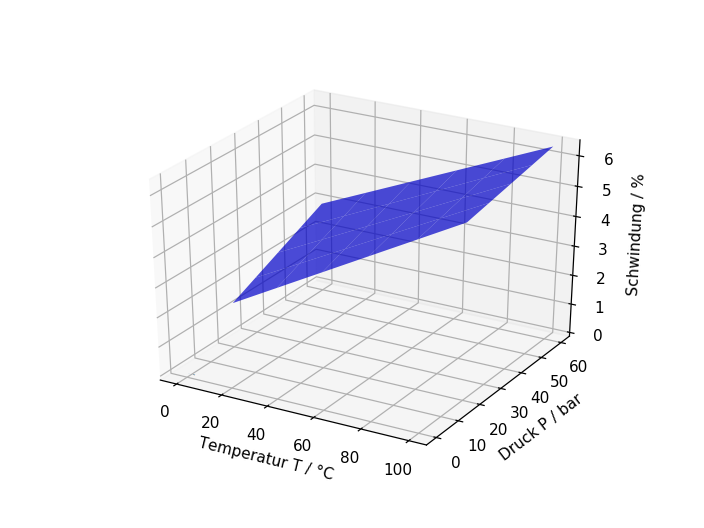

In [118]:
# Berechnung des Punktes minimaler Schwindung, Sinterzeit muss minimal
# sein, da beta(2) > 0, grafische Darstellung zu Identifikation des
# Optimums

temp = np.arange(0,120,20)
pres = np.arange(20,70,10)
Temp,Pres = np.meshgrid(temp,pres)
Sreg = (b[0] + b[1]*Temp  + b[2]*Pres + b[3]*Temp*Pres )


%matplotlib notebook

'''Grafische Darstellung'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Temp, Pres,Sreg ,color='b', alpha=0.7)
ax.set_xlabel('Temperatur T / °C') 
ax.set_ylabel('Druck P / bar') 
ax.set_zlabel('Schwindung / %') 
xopt = [0 , 20] # mit minimalen Werte von Pres und Temp

Eine minimale Schwindung wird bei xopt = [0,20] erreicht. 

Durchführen einer Monte-Carlo-Simulation mit einem Stichprobenumfang N = 10000, dem Center-Point als Arbeitspunkt und Normalverteilungen mit den angegebenen Standardabweichungen.

In [132]:
# Monte-Carlo-Simulation im Center-Point
N = 10000
X = np.zeros((N,3))
gamma = 0.9973
Xmc =np.array([np.random.normal(50,0.5,10000), np.random.normal(20,0.1,10000), np.random.normal(40,1,10000)])

Smc = Schwindung(Xmc)


Berechnung des Prognosebereiches über die t-Verteilung, da die Varianz unbekannt ist.

In [151]:
#Prognosebereich im Center Point
Smean = Smc.mean()
Smin = Smean + t.ppf((1-gamma)/2,N-1)*Smc.std()*(1+1/N)**0.5
Smax = Smean + t.ppf((1+gamma)/2,N-1)*Smc.std()*(1+1/N)**0.5
Smean, Smin, Smax

(3.4629826631197544, 1.1859400311287471, 5.740025295110771)

Simulation führt zu dem Mittelwert S = 3.46298 % und dem Prognosebereich Smin = 1.18594 % und Smax = 5.74002 %. Dabei können die absoluten Zahlen wegen des Rauschens bei dem Versuch "Python-Funktion" Schwindung variieren.


g) Aus dem Ansatz zur Tolerierung unkorrelierter Größen ergibt sich in dem Arbeitspunkt

$σ_S^2=E_{Temp}^2⋅σ_{Temp}^2+E_{Time}^2⋅σ_{Time}^2+E_{Pr⁡es}^2⋅σ_{Pr⁡es}^2$



Numerische Berechnung der Empfindlichkeiten über die linearen Regressionskoeffizienten, anschließend statistische Tolerierung bei normalverteilten Einflussgrößen



In [175]:
# Anteile an der Varianz
#reg = regstats(Smc,Xmc,'linear','tstat');

dataa_Dic={'Te':Xmc[:,0], 'Ti':Xmc[:,1], 'Pr':Xmc[:,2],'Smc':Smc}

modelv = ols("Smc ~  Te + Ti+ Pr " , dataa_Dic).fit()

Sig = np.array([0.5, 0.1, 1])
bv=np.array(modelv.params)
Var = bv[1:4]**2*Sig.T**2
Var

array([0.00144414, 0.00029005, 0.09425178])

Darstellung der entsprechenden Standardabweichungen als Säulendiagramm:

<IPython.core.display.Javascript object>


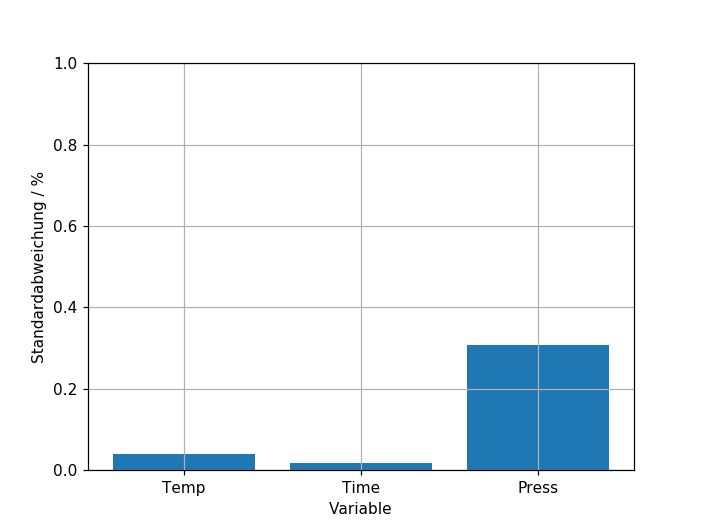

In [171]:
#Darstellung der entsprechenden Standardabweichungen als Säulendiagramm
%matplotlib notebook
plt.bar([1,2,3],Var**0.5,tick_label=['Temp','Time', 'Press'])
plt.ylim(top=1)
plt.xlabel('Variable')  
plt.ylabel('Standardabweichung / %')
plt.grid()


Wesentliche Toleranzursache ist die Variation des Sinterdruckes. Dabei können die absoluten Zahlen wegen des Rauschens bei dem Versuch "Python-Funktion" Schwindung variieren.

h) Die Toleranzrechnung berücksichtigt nur die Toleranzquellen Sintertemperatur, Sinterzeit und Sinterdruck. Bei dem Versuch existieren jedoch weitere Toleranzquellen, was zum Beispiel an dem Konfidenzbereich im Center-Point abgelesen werden kann, bei dem die Variablen Temp, Time und Pres konstant gehalten werden. Daraus ergeben sich starke Abweichungen zwischen Prognosebereich und Sensitivitätsanalyse. 

In [177]:
#Vergleich der beiden Rechnungen
Toleranzrechnung = 6*(Var.sum())**0.5
Prognosebereich = Smax-Smin

Test = Toleranzrechnung - Prognosebereich
Test

-2.695189099324124

Richtig wäre eine Toleranzrechnung

$σ_S^2=E_{Temp}^2⋅σ_{Temp}^2+E_{Time}^2⋅σ_{Time}^2+E_{Pr⁡es}^2⋅σ_{Pr⁡es}^2+σ_{Sunbekannt}^2$



Wird die interne Toleranzquelle beseitigt, stimmen die Rechnungen überein.